### 01. Importing Libraries

In [1]:
# Import Libraries and Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
import scipy 
from scipy import stats
import warnings

warnings.filterwarnings("ignore") 

In [2]:
%matplotlib inline

## 02. Importing Data and Standardization

In [3]:
# Set path
path = 'C:/Users/jeong/OneDrive/Desktop/CF Files/Achievement 6'

In [4]:
# Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'food_surplus_cleaned.csv'))

In [5]:
# Look at data
df.head()

,Unnamed: 0,year,state,sector,sub_sector,sub_sector_category,food_type,tons_surplus,tons_supply,us_dollars_surplus,...,tons_incinerated,tons_land_application,tons_landfilled,tons_sewer,tons_refuse_discards,upstream_mtco2e_footprint,downstream_mtco2e_footprint,total_mtco2e_footprint,gallons_water_footprint,meals_wasted
0,0,2021,Alabama,Farm,Not Applicable,Not Applicable,Dry Goods,8314.881697,320214.881700,3.883810e+06,...,0.000000,0.0,0.000000,0.0,0.000000,34693.574640,2.560352,34696.134990,4.676082e+09,1.385814e+07
1,1,2021,Alabama,Farm,Not Applicable,Not Applicable,Produce,56169.900990,216424.760100,1.586598e+07,...,13.232212,0.0,354.329224,0.0,688.009528,11481.349950,2256.026644,13737.376590,1.828809e+09,9.289640e+07
2,2,2021,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Breads & Bakery,5.014448,188.451867,2.527011e+04,...,0.178206,0.0,4.771954,0.0,0.000000,11.966534,7.289450,19.255983,9.666914e+04,8.269175e+03
3,3,2021,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Dairy & Eggs,2.385432,89.648781,1.279831e+04,...,0.084775,0.0,2.270075,0.0,0.000000,11.419306,1.124870,12.544176,6.806127e+05,3.933744e+03
4,4,2021,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Dry Goods,4.263947,160.246725,1.471922e+04,...,0.151534,0.0,4.057747,0.0,0.000000,13.478114,4.155081,17.633195,5.264528e+05,7.031547e+03


In [6]:
# Check shape
df.shape

(173364, 31)

In [7]:
# Remove categorical variables because k-means only handles numerical variables
# 'tons_uneaten' was dropped due to it being redundant to 'tons_eaten'
# 'upstream_mtco2e_footprint' and 'downstream_mtco2e_footprint' are redundant to 'total_mtco2e_footprint'
df_1 = df.drop(columns=['Unnamed: 0', 'year', 'state', 'sector', 'sub_sector', 'sub_sector_category', 'food_type', 'tons_uneaten', 'upstream_mtco2e_footprint', 'downstream_mtco2e_footprint'])

In [8]:
# Create new column using 'us_dollars_surplus' and 'tons_surplus' to improve the algorithm
df_1['dollars_per_ton_surplus'] = df_1['us_dollars_surplus']/df_1['tons_surplus']

In [9]:
# Use 'dollars_per_ton_surplus' instead of 'tons_surplus' and 'us_dollars_surplus'
df_2 = df_1.drop(columns=['tons_surplus', 'us_dollars_surplus'])

In [10]:
# Check data
df_2.head()

,tons_supply,tons_waste,tons_eaten,tons_inedible_parts,tons_not_fit_for_human_consumption,tons_donated,tons_biomaterial_processing,tons_animal_feed,tons_anaerobically_digested,tons_composted,tons_not_harvested,tons_incinerated,tons_land_application,tons_landfilled,tons_sewer,tons_refuse_discards,total_mtco2e_footprint,gallons_water_footprint,meals_wasted,dollars_per_ton_surplus
0,320214.881700,8314.881697,0.000000,0.000000,2102.932543,0.000000,0.0,0.000000,0.000000,0.000000,8314.881697,0.000000,0.0,0.000000,0.0,0.000000,34696.134990,4.676082e+09,1.385814e+07,467.091473
1,216424.760100,53641.652180,432.063432,19990.791320,25916.374330,432.063432,0.0,2096.185379,0.000000,0.000000,52586.081220,13.232212,0.0,354.329224,0.0,688.009528,13737.376590,1.828809e+09,9.289640e+07,282.464102
2,188.451867,4.960965,0.052943,0.815086,2.165128,0.052943,0.0,0.000540,0.001080,0.009724,0.000000,0.178206,0.0,4.771954,0.0,0.000000,19.255983,9.666914e+04,8.269175e+03,5039.460827
3,89.648781,2.359990,0.025186,0.019884,0.526407,0.025186,0.0,0.000257,0.000514,0.004626,0.000000,0.084775,0.0,2.270075,0.0,0.000000,12.544176,6.806127e+05,3.933744e+03,5365.193792
4,160.246725,4.218469,0.045019,0.101294,1.110107,0.045019,0.0,0.000459,0.000919,0.008269,0.000000,0.151534,0.0,4.057747,0.0,0.000000,17.633195,5.264528e+05,7.031547e+03,3452.016549


In [11]:
# Check for null values
df_2.isnull().sum()

tons_supply                               0
tons_waste                                0
tons_eaten                                0
tons_inedible_parts                       0
tons_not_fit_for_human_consumption        0
tons_donated                              0
tons_biomaterial_processing               0
tons_animal_feed                          0
tons_anaerobically_digested               0
tons_composted                            0
tons_not_harvested                        0
tons_incinerated                          0
tons_land_application                     0
tons_landfilled                           0
tons_sewer                                0
tons_refuse_discards                      0
total_mtco2e_footprint                    0
gallons_water_footprint                   0
meals_wasted                              0
dollars_per_ton_surplus               14652
dtype: int64

In [12]:
# Create subset without null values
null_dollars = df_2['dollars_per_ton_surplus'].isnull()
df_3 = df_2[~null_dollars]

df_3.head()

,tons_supply,tons_waste,tons_eaten,tons_inedible_parts,tons_not_fit_for_human_consumption,tons_donated,tons_biomaterial_processing,tons_animal_feed,tons_anaerobically_digested,tons_composted,tons_not_harvested,tons_incinerated,tons_land_application,tons_landfilled,tons_sewer,tons_refuse_discards,total_mtco2e_footprint,gallons_water_footprint,meals_wasted,dollars_per_ton_surplus
0,320214.881700,8314.881697,0.000000,0.000000,2102.932543,0.000000,0.0,0.000000,0.000000,0.000000,8314.881697,0.000000,0.0,0.000000,0.0,0.000000,34696.134990,4.676082e+09,1.385814e+07,467.091473
1,216424.760100,53641.652180,432.063432,19990.791320,25916.374330,432.063432,0.0,2096.185379,0.000000,0.000000,52586.081220,13.232212,0.0,354.329224,0.0,688.009528,13737.376590,1.828809e+09,9.289640e+07,282.464102
2,188.451867,4.960965,0.052943,0.815086,2.165128,0.052943,0.0,0.000540,0.001080,0.009724,0.000000,0.178206,0.0,4.771954,0.0,0.000000,19.255983,9.666914e+04,8.269175e+03,5039.460827
3,89.648781,2.359990,0.025186,0.019884,0.526407,0.025186,0.0,0.000257,0.000514,0.004626,0.000000,0.084775,0.0,2.270075,0.0,0.000000,12.544176,6.806127e+05,3.933744e+03,5365.193792
4,160.246725,4.218469,0.045019,0.101294,1.110107,0.045019,0.0,0.000459,0.000919,0.008269,0.000000,0.151534,0.0,4.057747,0.0,0.000000,17.633195,5.264528e+05,7.031547e+03,3452.016549


In [13]:
# Standardize the data to eliminate bias from difference between variables' scales
for column in df_3.columns:
    df_3[column] = stats.zscore(df_3[column])


## 03. Elbow Technique

In [14]:
# Define the range of potential clustes in the data and k-means clusters in the range assigned
num_cl = range(1,10)
kmeans = [KMeans(n_clusters=i, n_init = 10) for i in num_cl]

In [15]:
# Creates a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df_3).score(df_3) for i in range(len(kmeans))]

score

[-3174239.9999999995,
 -2438989.7407220253,
 -1913655.4004064123,
 -1598833.492348537,
 -1469811.3251041553,
 -1302272.858913012,
 -1153778.7193113265,
 -1019230.3640818202,
 -916269.1861419434]

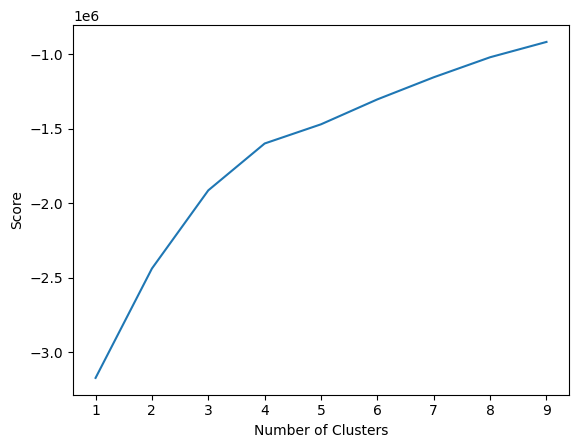

In [16]:
# PLot the elbow curve using PyLab
pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.show()

There is a kink at 4 and after that the curve is straightened out. The optimal count should be 4.

## 04. K-Means Clustering

In [17]:
# Create the k-means object
kmeans = KMeans(n_clusters = 4)

In [18]:
# Fit the k-means object to the data
kmeans.fit(df_3)

KMeans(n_clusters=4)

In [19]:
df_3['clusters']= kmeans.fit_predict(df_3)

In [20]:
pd.set_option('display.max_columns', None)
df_3.head()

,tons_supply,tons_waste,tons_eaten,tons_inedible_parts,tons_not_fit_for_human_consumption,tons_donated,tons_biomaterial_processing,tons_animal_feed,tons_anaerobically_digested,tons_composted,tons_not_harvested,tons_incinerated,tons_land_application,tons_landfilled,tons_sewer,tons_refuse_discards,total_mtco2e_footprint,gallons_water_footprint,meals_wasted,dollars_per_ton_surplus,clusters
0,0.291129,0.039098,-0.134386,-0.064865,-0.036751,-0.108951,-0.052913,-0.061639,-0.033196,-0.101834,0.128113,-0.099065,-0.025543,-0.154657,-0.07656,-0.022441,0.052271,0.304669,0.027863,-0.987748,0
1,0.171407,0.712381,-0.128872,0.852272,0.585139,0.281781,-0.052913,0.176914,-0.033196,-0.101834,0.908944,-0.094722,-0.025543,-0.130370,-0.07656,0.316601,-0.076702,0.027436,0.691478,-1.030591,0
2,-0.078022,-0.084338,-0.134385,-0.064828,-0.091613,-0.108904,-0.052913,-0.061639,-0.033195,-0.101833,-0.018541,-0.099006,-0.025543,-0.154330,-0.07656,-0.022441,-0.161118,-0.150622,-0.088422,0.073283,0
3,-0.078136,-0.084376,-0.134385,-0.064864,-0.091656,-0.108929,-0.052913,-0.061639,-0.033196,-0.101834,-0.018541,-0.099037,-0.025543,-0.154502,-0.07656,-0.022441,-0.161159,-0.150566,-0.088459,0.148870,0
4,-0.078055,-0.084349,-0.134385,-0.064860,-0.091640,-0.108911,-0.052913,-0.061639,-0.033196,-0.101833,-0.018541,-0.099015,-0.025543,-0.154379,-0.07656,-0.022441,-0.161128,-0.150581,-0.088433,-0.295088,0


In [21]:
df_3['clusters'].value_counts()

0    157105
2      1560
1        24
3        23
Name: clusters, dtype: int64

## 05. Visualizations Using Clustered Data

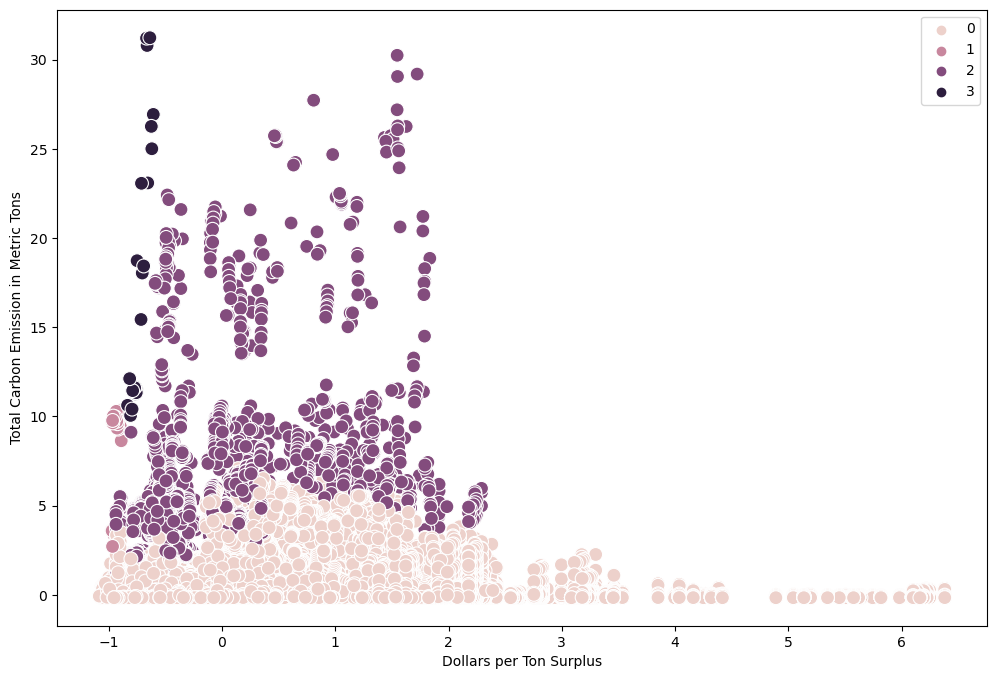

In [22]:
# PLot the clusters for the "dollars_per_ton_surplus" and "total_mtco2e_footprint" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_3['dollars_per_ton_surplus'], y=df_3['total_mtco2e_footprint'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Dollars per Ton Surplus')
plt.ylabel('Total Carbon Emission in Metric Tons')
plt.show()

This plot shows that the majority of the data is centered around the lower end as shown by the pink cluster, cluster 0. Additionally, the carbon emissions from the tons of surplus is mostly under 10 metric tons. Meanwhile, a smaller proportion, represented by the black cluster, cluster 3, shows that despite the lower dollars per ton surplus, there is high carbon emissions. This suggests that there is not a direct relationship between the two variables and that there are many different factors at play that would create the spread in the data observed in the plot. Some of the factors might be due to the different categories, such as state, sector and food type. Therefore, further analysis is necessary.

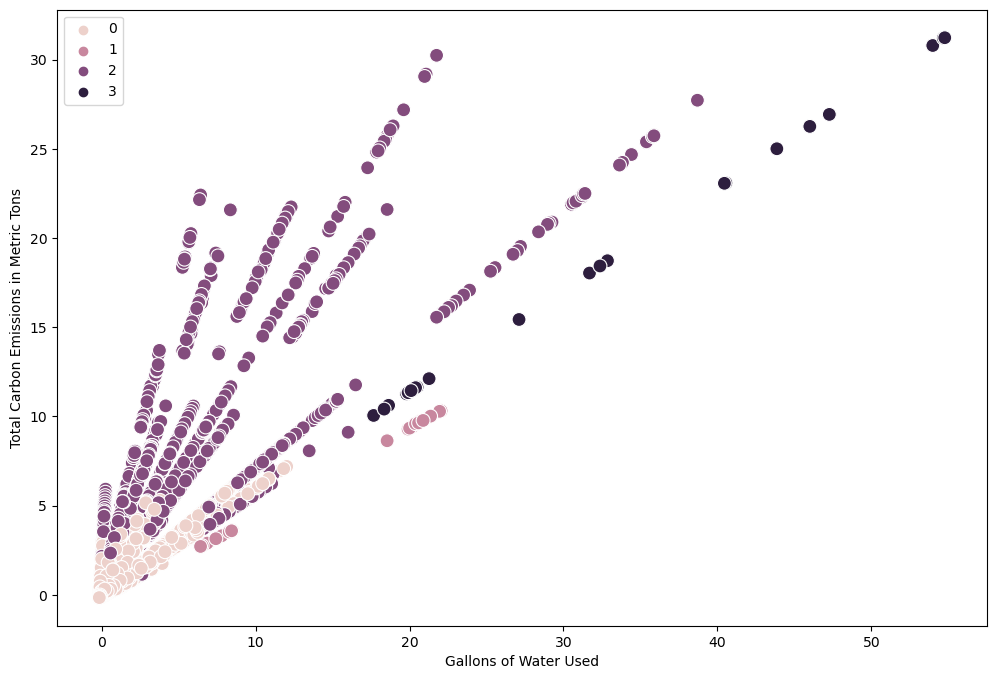

In [23]:
# PLot the clusters for the "gallons_water_footprint" and "total_mtco2e_footprint" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_3['gallons_water_footprint'], y=df_3['total_mtco2e_footprint'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Gallons of Water Used')
plt.ylabel('Total Carbon Emissions in Metric Tons')
plt.show()

In this plot, most of the data points are towards the left corner and a significant amount of the points in the black cluster are around the lower amounts of gallons of water used. This suggests that even with lower amounts of gallons of water there could be a higher amount of carbon emissions. Therefore, the data should be explored further, because the higher amount of carbon emission could be due to many different factors such as how or where the water is used and the regulations/policy around water usage.

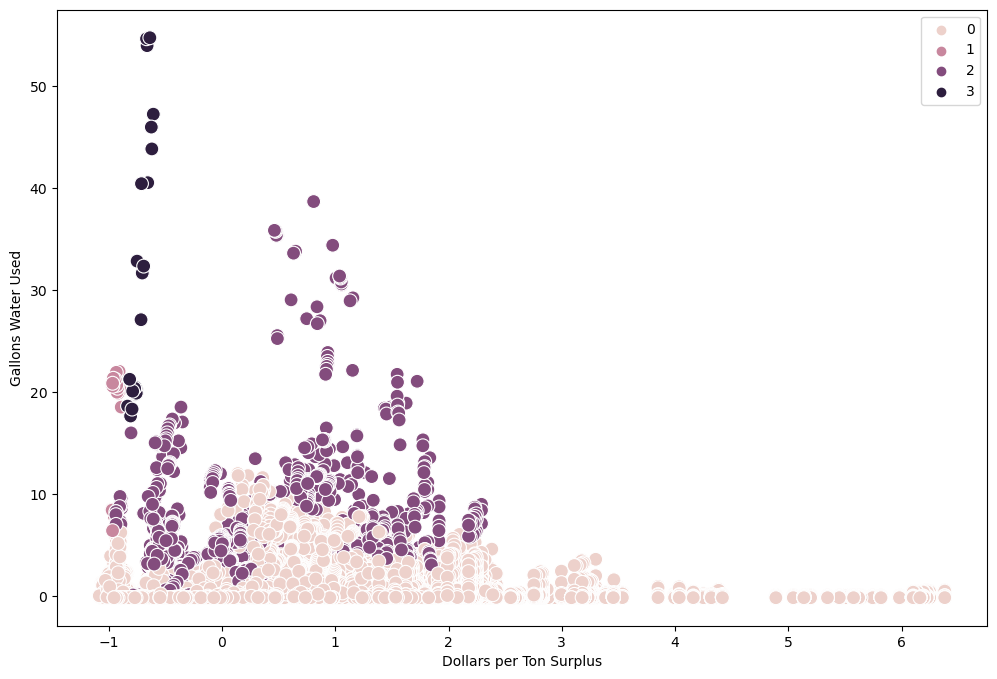

In [24]:
# PLot the clusters for the "dollars_per_ton_surplus" and "gallons_water_footprint" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_3['dollars_per_ton_surplus'], y=df_3['gallons_water_footprint'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Dollars per Ton Surplus')
plt.ylabel('Gallons Water Used')
plt.show()

This scatterplot shows insights differing from expectations. Gallons of water used is mostly measured by the amount of water used in the creation of the food surplus, therefore, I thought there would be a much more obvious correlation between the two. While we can see that there seems to be increase in surplus in terms of US Dollars if water usage is increased, it is difficult to observe the significance of the increase. This is due to the fact that most of the data points and clusters are near the lower end of both variables. Additionally, while cluster 1 does show an increase it, varies greatly and cluster 1 is significantly smaller than the other clusters so any insights from this clusters would most likely be insignificant. Further, data exploration is needed to understand the relationship between the two variables.

In [25]:
# Creating flags for different cluters and creating column 'cluster'
df_3.loc[df_3['clusters'] == 3, 'cluster'] = 'black'
df_3.loc[df_3['clusters'] == 2, 'cluster'] = 'dark purple'
df_3.loc[df_3['clusters'] == 1, 'cluster'] = 'purple'
df_3.loc[df_3['clusters'] == 0, 'cluster'] = 'pink'

In [26]:
# Grouping by 'cluster' colors and calculating statistics
df_3.groupby('cluster').agg({'tons_supply': ['mean', 'median'],
                             'tons_waste': ['mean', 'median'],
                             'tons_eaten': ['mean', 'median'],
                             'tons_inedible_parts': ['mean', 'median'],
                             'tons_not_fit_for_human_consumption': ['mean', 'median'],
                             'tons_donated': ['mean', 'median'],
                             'tons_biomaterial_processing': ['mean', 'median'],
                             'tons_animal_feed': ['mean', 'median'],
                             'tons_anaerobically_digested': ['mean', 'median'],
                             'tons_composted': ['mean', 'median'],
                             'tons_not_harvested': ['mean', 'median'],
                             'tons_incinerated': ['mean', 'median'],
                             'tons_land_application': ['mean', 'median'],
                             'tons_landfilled': ['mean', 'median'],
                             'tons_sewer': ['mean', 'median'],
                             'tons_refuse_discards': ['mean', 'median'],
                             'total_mtco2e_footprint': ['mean', 'median'],
                             'gallons_water_footprint': ['mean', 'median'],
                             'meals_wasted': ['mean', 'median'],
                             'dollars_per_ton_surplus': ['mean', 'median']})

tons_supply            tons_waste            tons_eaten            \
                   mean     median       mean     median       mean    median   
cluster                                                                         
black         54.973711  48.006202  16.455896  14.251483   0.101613  0.070068   
dark purple    1.678056   0.760335   3.431280   2.633827   7.362277  5.509248   
pink          -0.029629  -0.076808  -0.045668  -0.083550  -0.073199 -0.134377   
purple        32.193891  30.519366  60.140515  56.736771   0.515263  0.498738   

            tons_inedible_parts            tons_not_fit_for_human_consumption  \
                           mean     median                               mean   
cluster                                                                         
black                 51.169981  44.443636                          29.068347   
dark purple            1.767149   0.075310                           4.074254   
pink                  -0.030153  -0.064615                          -0.052690   
purple                33.477696  31.945123                          52.228545   

                       tons_donated            tons_biomaterial_processing  \
                median         mean     median                        mean   
cluster                                                                      
black        25.241706    16.613921  14.378633                   -0.052913   
dark purple   2.978167     0.372634  -0.108951                    0.058085   
pink         -0.091392    -0.013148  -0.108450                   -0.000561   
purple       50.538378    45.925224  44.754274                   -0.052913   

                      tons_animal_feed            tons_anaerobically_digested  \
               median             mean     median                        mean   
cluster                                                                         
black       -0.052913         0.783686   0.872600                   68.956348   
dark purple -0.052913         1.108216   0.172417                    0.513457   
pink        -0.052913        -0.018124  -0.061638                   -0.015189   
purple      -0.052913        45.856579  44.370294                   -0.033196   

                       tons_composted           tons_not_harvested             \
                median           mean    median               mean     median   
cluster                                                                         
black        59.893006      -0.101834 -0.101834          -0.018541  -0.018541   
dark purple  -0.033196       6.126058  3.775594           0.084392  -0.018541   
pink         -0.033192      -0.060799 -0.101822          -0.011264  -0.018541   
purple       -0.033196      -0.101834 -0.101834          68.264041  63.916634   

            tons_incinerated           tons_land_application             \
                        mean    median                  mean     median   
cluster                                                                   
black              -0.043394 -0.052559             69.657425  60.502987   
dark purple         5.157334  1.439800              0.476710  -0.025543   
pink               -0.051278 -0.099065             -0.014927  -0.025543   
purple              0.483300  0.445219             -0.025543  -0.025543   

            tons_landfilled           tons_sewer            \
                       mean    median       mean    median   
cluster                                                      
black              0.342872  0.392618  -0.076560 -0.076560   
dark purple        6.911108  5.422310   5.522276  2.784518   
pink              -0.069023 -0.151692  -0.054811 -0.076560   
purple             2.276197  2.226654  -0.076560 -0.076560   

            tons_refuse_discards            total_mtco2e_footprint             \
                            mean     median                   mean     median   
cluster                                                               

These results are useful in that they show that most of the data is clustered around lower values regardless of the variable and that there a few data points that are skewing the data. Additionally, there seems to be a high spread in the data. Using this information we could look into the few data points and analyze their impact. To explain, there could be specific categorical variables such as the state or the food type that contribute to these extreme values. For example, residences are a major contributor to food surplus, so if we explore the data more we might see that the residence sector of each state were the reason behind the extreme values and should be our focus if our goal is to decrease food surplus. Furthermore, knowing that there is a high spread in the data we need to consider difference in each state, sector and food type. Whether it is different food/waste regulation in states or sectors or the amount of food waste from specific food types.

In [27]:
df_3.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'food_surplus_cluster_1.csv'))